## Imports

In [2]:
from JSU_lib import *

## Functions

## Reading input data

In [3]:
cols_0 = ["origin", "rep_chain", "ID", "centre", "n_aas", "RoG", "SASA", "VOL", "up_aas", "aas"]

cols_l = cols_0 + ["ion_prop", "cluster_dist", "monomer_prop"]

cols_1 = cols_0 + ["RANK", ]
cols_2 = cols_1 + ["score", ]
cols_3 = cols_1 + ["n_points", ]
cols_4 = cols_1 + ["prob", ]

In [4]:
combined_df_filt = pd.read_pickle("./results/ALL_PREDS_COMBINED_RIGHT_EXTENDED.pkl")

LIGYSIS = combined_df_filt.query('origin == "LIGYSIS"')[cols_l].copy().reset_index(drop = True)
VN_EGNN = combined_df_filt.query('origin == "VN-EGNN"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
IFSP = combined_df_filt.query('origin == "IF-SitePred"')[cols_3].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
GrASP = combined_df_filt.query('origin == "GrASP"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
PUResNet = combined_df_filt.query('origin == "PUResNet"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
DeepPocket_segmented = combined_df_filt.query('origin == "DeepPocket-Segmented"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
P2RANK_cons = combined_df_filt.query('origin == "P2Rank+Cons"')[cols_4].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
P2RANK = combined_df_filt.query('origin == "P2Rank"')[cols_4].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
fpocket = combined_df_filt.query('origin == "fpocket"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
PocketFinder = combined_df_filt.query('origin == "PocketFinder"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
Ligsite = combined_df_filt.query('origin == "Ligsite"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)
Surfnet = combined_df_filt.query('origin == "Surfnet"')[cols_2].copy().sort_values(["rep_chain", "RANK"]).reset_index(drop = True)

In [5]:
len(LIGYSIS.rep_chain.unique())

2775

# ANALYSIS

## How many targets does each method predict on?

In [6]:
LIGYSIS_reps = LIGYSIS.rep_chain.unique().tolist()
VNEGNN_reps = VN_EGNN.rep_chain.unique().tolist()
IFSP_reps = IFSP.rep_chain.unique().tolist()
GRASP_reps = GrASP.rep_chain.unique().tolist()
PUResNet_reps = PUResNet.rep_chain.unique().tolist()
DeepPocket_segmented_reps = DeepPocket_segmented.rep_chain.unique().tolist()
P2RANK_cons_reps = P2RANK_cons.rep_chain.unique().tolist()
P2RANK_reps = P2RANK.rep_chain.unique().tolist()
fpocket_reps = fpocket.rep_chain.unique().tolist()
PocketFinder_reps = PocketFinder.rep_chain.unique().tolist()
Ligsite_reps = Ligsite.rep_chain.unique().tolist()
Surfnet_reps = Surfnet.rep_chain.unique().tolist()


n_LIGYSIS_reps = len(LIGYSIS_reps)
n_VNEGNN_reps = len(VNEGNN_reps)
n_IFSP_reps = len(IFSP_reps)
n_GRASP_reps = len(GRASP_reps)
n_PURESNET_reps = len(PUResNet_reps)
n_DEEPPOCKET_SEG_reps = len(DeepPocket_segmented_reps)
n_P2RANK_CONS_reps = len(P2RANK_cons_reps)
n_P2RANK_reps = len(P2RANK_reps)
n_FPOCKET_reps = len(fpocket_reps)
n_POCKETFINDER_reps = len(PocketFinder_reps)
n_LIGSITE_reps = len(Ligsite_reps)
n_SURFNET_reps = len(Surfnet_reps)

print("LIGYSIS     ", n_LIGYSIS_reps)
print("VN-EGNN     ", n_VNEGNN_reps, round((100*n_VNEGNN_reps/n_LIGYSIS_reps), 2))  #99.6% 
print("IFSP        ", n_IFSP_reps, round((100*n_IFSP_reps/n_LIGYSIS_reps), 2))  # 74.77% 
print("GrASP       ", n_GRASP_reps, round((100*n_GRASP_reps/n_LIGYSIS_reps), 2))  # 99.86% 
print("PUResNet    ", n_PURESNET_reps, round((100*n_PURESNET_reps/n_LIGYSIS_reps), 2))  # 85.05% 
print("DeepPocket  ", n_DEEPPOCKET_SEG_reps, round((100*n_DEEPPOCKET_SEG_reps/n_LIGYSIS_reps), 2))  #84.65%
print("P2Rank+Cons ", n_P2RANK_CONS_reps, round((100*n_P2RANK_CONS_reps/n_LIGYSIS_reps), 2))  #92.94%
print("P2Rank      ", n_P2RANK_reps, round((100*n_P2RANK_reps/n_LIGYSIS_reps), 2))  # 85.56% 
print("fpocket     ", n_FPOCKET_reps, round((100*n_FPOCKET_reps/n_LIGYSIS_reps), 2))  # 99.4%
print("PocketFinder", n_POCKETFINDER_reps, round((100*n_POCKETFINDER_reps/n_LIGYSIS_reps), 2))  # 100%
print("Ligsite     ", n_LIGSITE_reps, round((100*n_LIGSITE_reps/n_LIGYSIS_reps), 2))  # 100%
print("Surfnet     ", n_SURFNET_reps, round((100*n_SURFNET_reps/n_LIGYSIS_reps), 2))  # 100%

LIGYSIS      2775
VN-EGNN      2764 99.6
IFSP         2075 74.77
GrASP        2771 99.86
PUResNet     2360 85.05
DeepPocket   2349 84.65
P2Rank+Cons  2579 92.94
P2Rank       2402 86.56
fpocket      2759 99.42
PocketFinder 2775 100.0
Ligsite      2775 100.0
Surfnet      2775 100.0


In [9]:
[el for el in LIGYSIS_reps if el not in VNEGNN_reps]

['3ghg_C',
 '3k2s_B',
 '6bcu_A',
 '6oqa_H',
 '6vfr_B',
 '6vfu_B',
 '7a7d_a',
 '7pgt_N',
 '7qm2_B',
 '8bbg_C',
 '8tar_N']

In [10]:
[el for el in LIGYSIS_reps if el not in GRASP_reps]

['2jg9_F', '3eb5_A', '4f14_A', '6oqa_H']

In [14]:
len([el for el in LIGYSIS_reps if el not in fpocket_reps])

16

In [11]:
geom_df = pd.read_pickle("./results/LIGYSIS_3448_geometric_features_TRANS_SHAPE.pkl")

In [12]:
no_VNEGNN_reps = [rep for rep in LIGYSIS_reps if rep not in VNEGNN_reps]
print(len(no_VNEGNN_reps))

no_IFSP_reps = [rep for rep in LIGYSIS_reps if rep not in IFSP_reps]
print(len(no_IFSP_reps))

no_GRASP_reps = [rep for rep in LIGYSIS_reps if rep not in GRASP_reps]
print(len(no_GRASP_reps))

no_PUResNet_reps = [rep for rep in LIGYSIS_reps if rep not in PUResNet_reps]
print(len(no_PUResNet_reps))

no_DEEPPOCKET_SEG_reps = [rep for rep in LIGYSIS_reps if rep not in DeepPocket_segmented_reps]
print(len(no_DEEPPOCKET_SEG_reps))

no_P2RANK_CONS_reps = [rep for rep in LIGYSIS_reps if rep not in P2RANK_cons_reps]
print(len(no_P2RANK_CONS_reps))

no_P2RANK_reps = [rep for rep in LIGYSIS_reps if rep not in P2RANK_reps]
print(len(no_P2RANK_reps))

no_FPOCKET_reps = [rep for rep in LIGYSIS_reps if rep not in fpocket_reps]
print(len(no_FPOCKET_reps))

no_PocketFinder_reps = [rep for rep in LIGYSIS_reps if rep not in PocketFinder_reps]
print(len(no_PocketFinder_reps))

no_Ligsite_reps = [rep for rep in LIGYSIS_reps if rep not in Ligsite_reps]
print(len(no_Ligsite_reps))

no_Surfnet_reps = [rep for rep in LIGYSIS_reps if rep not in Surfnet_reps]
print(len(no_Surfnet_reps))

11
700
4
415
426
196
373
16
0
0
0


## Where don't methods predict any sites?

In [13]:
bad_reps = read_from_pickle("./results/OLD/other_errrors_reps.pkl")

In [14]:
prot_class_dict = read_from_pickle("./results/prot_class_dict.pkl")
protein_class_palette = {
    "ELONGATED": "firebrick",
    "ELONGATED+TINY": "orange",
    "GLOBULAR": "purple",
    "GLOBULAR+TINY": "cornflowerblue",
}

In [15]:
IFSP_no_preds_clusters = [prot_class_dict[el] for el in no_IFSP_reps if el in prot_class_dict and el not in bad_reps]
PUResNet_no_preds_clusters = [prot_class_dict[el] for el in no_PUResNet_reps if el in prot_class_dict and el not in bad_reps]
DEEPPOCKET_SEG_no_preds_clusters = [prot_class_dict[el] for el in no_DEEPPOCKET_SEG_reps if el in prot_class_dict and el not in bad_reps]
P2RANK_CONS_no_preds_clusters = [prot_class_dict[el] for el in no_P2RANK_CONS_reps if el in prot_class_dict and el not in bad_reps]
P2RANK_no_preds_clusters = [prot_class_dict[el] for el in no_P2RANK_reps if el in prot_class_dict and el not in bad_reps]

In [16]:
ll = [
    frequency_count(IFSP_no_preds_clusters),
    frequency_count(PUResNet_no_preds_clusters),
    frequency_count(DEEPPOCKET_SEG_no_preds_clusters),
    frequency_count(P2RANK_CONS_no_preds_clusters),
    frequency_count(P2RANK_no_preds_clusters),
]

In [25]:
import importlib
import JSU_lib
importlib.reload(JSU_lib)
from JSU_lib import *

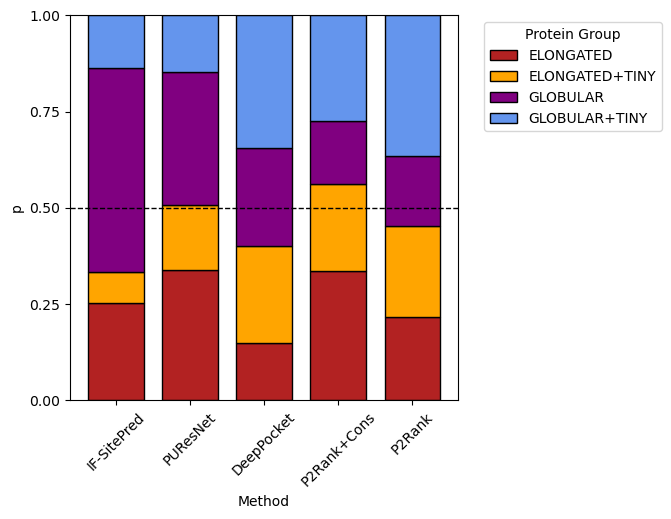

In [28]:
colors = list(protein_class_palette.values())
labels = list(protein_class_palette.keys())
plot_normalised_stacked_bar(
    ll, labels, ["IF-SitePred", "PUResNet","DeepPocket", "P2Rank+Cons", "P2Rank"],
    title="Normalised Stacked Bar Plot", legend_title="Protein Group", 
    colors = colors,
    DPI = 100,
    #out = "./figs/no_preds_protein_class.png"
)

## How many sites on each dataset?

In [21]:
n_sites_LIGYSIS = len(LIGYSIS.drop_duplicates(["rep_chain", "ID"]))
n_pockets_VNEGNN = len(VN_EGNN.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_IFSP = len(IFSP.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_GRASP = len(GrASP.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_PURESNET = len(PUResNet.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_DEEPPOCKET_SEG = len(DeepPocket_segmented.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_P2RANK_CONS = len(P2RANK_cons.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_P2RANK = len(P2RANK.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_FPOCKET = len(fpocket.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_POCKETFINDER = len(PocketFinder.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_LIGSITE = len(Ligsite.drop_duplicates(["rep_chain", "RANK"]))
n_pockets_SURFNET = len(Surfnet.drop_duplicates(["rep_chain", "RANK"]))

print(f"LIGYSIS:\t\t{n_sites_LIGYSIS}\t\t{1}")
print(f"VN-EGNN:\t\t{n_pockets_VNEGNN}\t\t{round(n_pockets_VNEGNN/n_sites_LIGYSIS, 2)}")
print(f"IF-SitePred:\t\t{n_pockets_IFSP}\t\t{round(n_pockets_IFSP/n_sites_LIGYSIS, 2)}")
print(f"GrASP:\t\t\t{n_pockets_GRASP}\t\t{round(n_pockets_GRASP/n_sites_LIGYSIS, 2)}")
print(f"PUResNet:\t\t{n_pockets_PURESNET}\t\t{round(n_pockets_PURESNET/n_sites_LIGYSIS, 2)}")
print(f"DeepPocket-SEG:\t\t{n_pockets_DEEPPOCKET_SEG}\t\t{round(n_pockets_DEEPPOCKET_SEG/n_sites_LIGYSIS, 2)}")
print(f"P2Rank:\t\t\t{n_pockets_P2RANK}\t\t{round(n_pockets_P2RANK/n_sites_LIGYSIS, 2)}")
print(f"P2Rank+Cons:\t\t{n_pockets_P2RANK_CONS}\t\t{round(n_pockets_P2RANK_CONS/n_sites_LIGYSIS, 2)}")
print(f"fpocket:\t\t{n_pockets_FPOCKET}\t\t{round(n_pockets_FPOCKET/n_sites_LIGYSIS, 2)}")
print(f"PocketFinder:\t\t{n_pockets_POCKETFINDER}\t\t{round(n_pockets_POCKETFINDER/n_sites_LIGYSIS, 2)}")
print(f"Ligsite:\t\t{n_pockets_LIGSITE}\t\t{round(n_pockets_LIGSITE/n_sites_LIGYSIS, 2)}")
print(f"Surfnet:\t\t{n_pockets_SURFNET}\t\t{round(n_pockets_SURFNET/n_sites_LIGYSIS, 2)}")

LIGYSIS:		6882		1
VN-EGNN:		13582		1.97
IF-SitePred:		44948		6.53
GrASP:			4694		0.68
PUResNet:		2621		0.38
DeepPocket-SEG:		21718		3.16
P2Rank:			12412		1.8
P2Rank+Cons:		10180		1.48
fpocket:		57859		8.41
PocketFinder:		8913		1.3
Ligsite:		6903		1.0
Surfnet:		9043		1.31


### How many sites per protein?

In [22]:
my_order = ["LIGYSIS", "VN-EGNN", "IF-SitePred", "GrASP", "PUResNet", "DeepPocket-Segmented", "P2Rank+Cons", "P2Rank", "fpocket", "PocketFinder", "Ligsite", "Surfnet"]
cut = 0

In [23]:
COMB_df = pd.concat(
    [
        LIGYSIS.query('cluster_dist <= 6'),
        VN_EGNN, IFSP, GrASP, PUResNet, DeepPocket_segmented,
        P2RANK_cons, P2RANK, fpocket, PocketFinder, Ligsite, Surfnet
    ]
).reset_index(drop = True)

In [25]:
sites_per_prot = get_sites_per_prot(COMB_df)

## Pockets per proteins

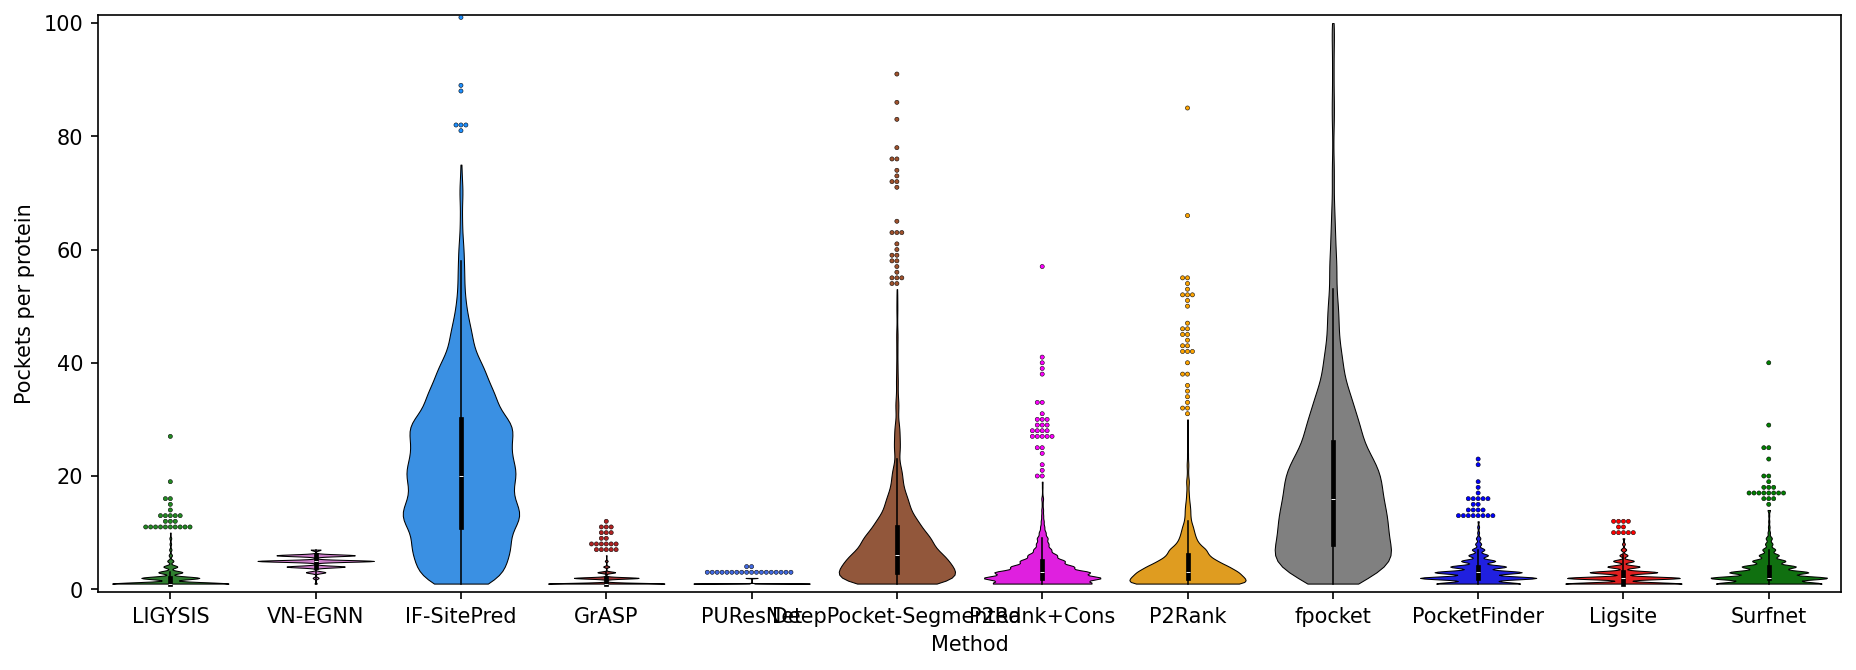

In [46]:
plot_violin_with_swarm(
    sites_per_prot, "sites_per_prot", 'Pockets per protein',
    FSIZE=(15, 5), DPI=150, palette=palette, my_order=my_order,
    #out = "./figs/n_pockets_per_chain_600.png",
    #ymax = 61.5
    ymax_inc = 1.5
)

## Number of pockets per protein vs protein chain size

In [26]:
n_ress_dict = read_from_pickle("./results/prot_n_ress_dict.pkl")

In [27]:
sites_per_prot["n_prot_ress"] = sites_per_prot.set_index('rep_chain').index.map(n_ress_dict)

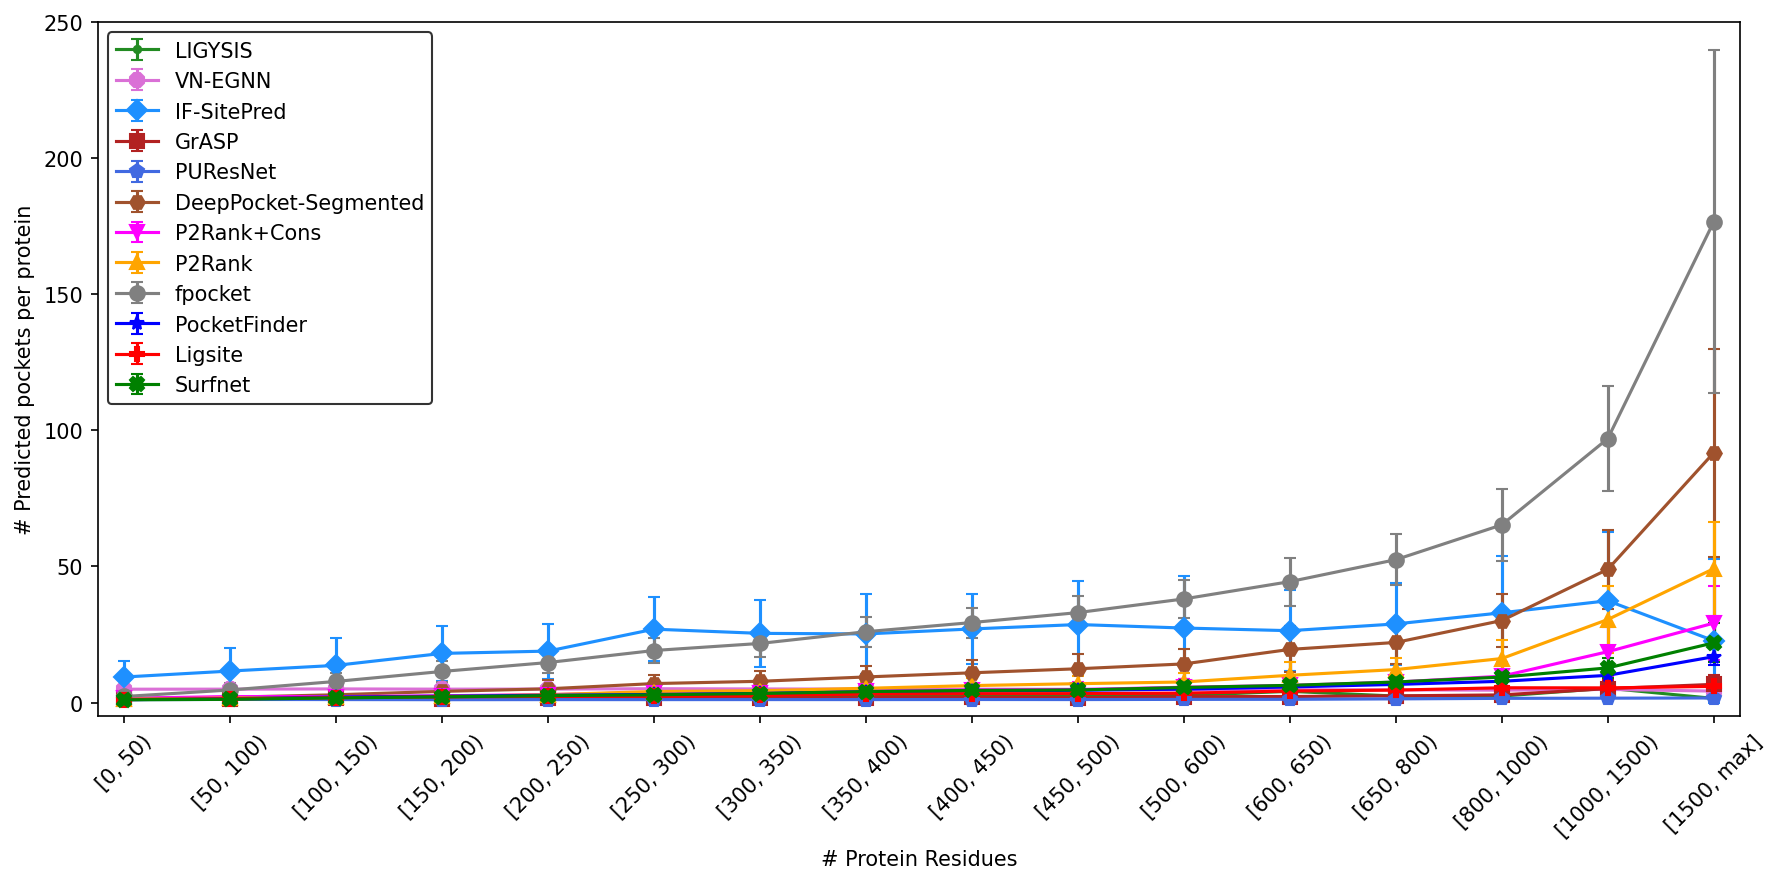

In [28]:
bins = [
    0,  50, 100, 150, 200, 250,
    300, 350, 400, 450, 500,
    600, 650, 800, 1000, 1500, 3800
]

# Bin 'n_prot_ress' into discrete intervals
sites_per_prot['n_prot_ress_bin'] = pd.cut(sites_per_prot['n_prot_ress'], bins=bins)

# Calculate mean and standard deviation (times 2) for each origin and bin
grouped = sites_per_prot.groupby(['origin', 'n_prot_ress_bin'])
stats_df = grouped['sites_per_prot'].agg(['mean', 'std']).reset_index()
stats_df['std'] = stats_df['std'] #* 2  # To represent approximately 95% confidence interval

# Initialize the plot
plt.figure(figsize=(12, 6), dpi = 150)

# Define the order of origins if it's not defined yet
# my_order = ['origin1', 'origin2', 'origin3', ...]  # Replace with your actual order

# Compute bin midpoints and labels for the x-axis
bin_labels = [f'[{int(left)}, {int(right)})' for left, right in zip(bins[:-1], bins[1:])]
bin_labels = bin_labels[:-1] + [f'[{int(bins[-2])}, max]']
#bin_midpoints = [(left + right) / 2 for left, right in zip(bins[:-1], bins[1:])]

# Plot each origin with error bars
for origin in my_order:
    marker = markers_dict[origin]
    linestyle = '-'
    #if origin in ["LIGYSIS"]:
    #    continue
    origin_stats = stats_df[stats_df['origin'] == origin]
    # Map the bin interval to its midpoint for plotting
    # Correct the standard deviation if the lower bound goes below 0
    yerr_lower = origin_stats['mean'] - origin_stats['std']
    yerr_lower = np.where(yerr_lower < 0, origin_stats['mean'], origin_stats['std'])
    

    # Plot the line and error bars
    line, caps, bars = plt.errorbar(
        range(len(bin_labels)), 
        origin_stats['mean'], 
        yerr=[yerr_lower, origin_stats['std']],  # Provide asymmetric error bars
        fmt=f"{markers_dict[origin]}", 
        label=origin,
        capsize=3,
        markersize=7,
        color = palette[origin],
        #mec = "k",
        #mew = 1,
        
        #elinewidth = 1
    )
    # Set the actual linestyle manually
    if isinstance(linestyle, tuple):
        #print(origin)
        line.set_dashes(linestyle)
    else:
        line.set_linestyle(linestyle)

# Customize the plot
#plt.title('Relation between Sites per Protein and Number of Protein Residues')
plt.xlabel('# Protein Residues')
plt.ylabel('# Predicted pockets per protein')
leg = plt.legend()#plt.legend(title='Method', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
leg.set_visible(True)
leg.get_frame().set_edgecolor('black')
plt.grid(False)
plt.xlim(-0.25, 15.25)
plt.ylim(-5,250)

# Set x-axis to use bin labels and be equidistant
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit legend and axis labels

#plt.savefig("./figs/n_pockets_per_n_aas_DEF.png")

plt.show()

## Size of sites (ROG)

In [371]:
combined_df.query('RoG != RoG').origin.value_counts()

VN-EGNN    429
Name: origin, dtype: int64

In [31]:
for origin in my_order:
    print(origin, round(100*(len(COMB_df.query('RoG > 10 & origin == @origin'))/len(COMB_df.query('origin == @origin'))),2))

LIGYSIS 12.76
VN-EGNN 0.0
IF-SitePred 0.11
GrASP 6.39
PUResNet 11.6
DeepPocket-Segmented 5.71
P2Rank+Cons 6.53
P2Rank 4.78
fpocket 1.82
PocketFinder 21.43
Ligsite 33.58
Surfnet 16.0


In [32]:
for origin in my_order:
    print(origin, round(100*(len(COMB_df.query('RoG == 0 & origin == @origin'))/len(COMB_df.query('origin == @origin'))),2))

LIGYSIS 1.53
VN-EGNN 1.0
IF-SitePred 0.0
GrASP 7.82
PUResNet 1.26
DeepPocket-Segmented 2.84
P2Rank+Cons 0.0
P2Rank 0.0
fpocket 0.0
PocketFinder 0.0
Ligsite 0.0
Surfnet 0.0


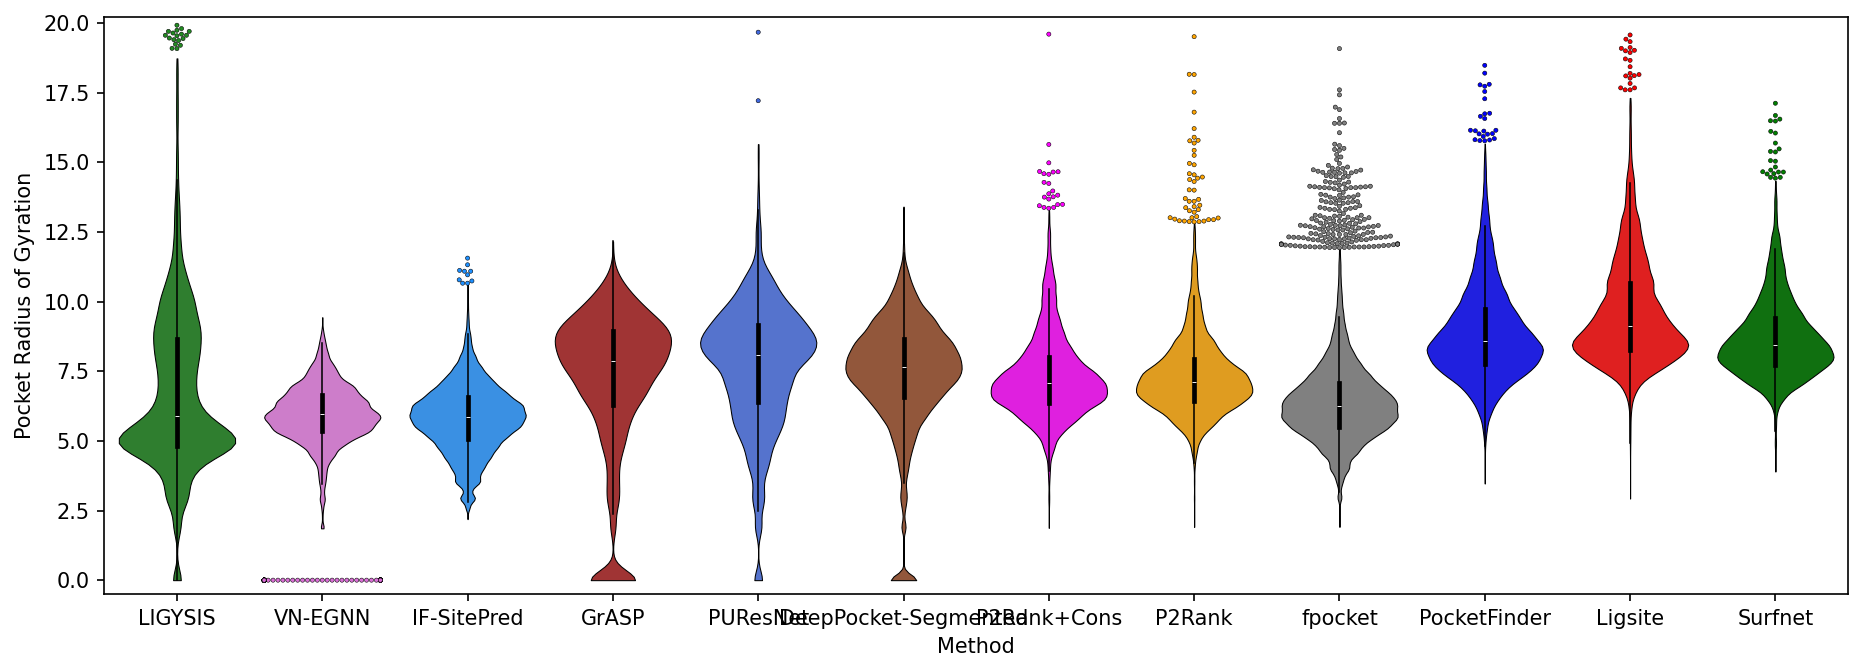

In [29]:
plot_violin_with_swarm(
    COMB_df, "RoG",  'Pocket Radius of Gyration',
    FSIZE=(15, 5), DPI=150, palette=palette, my_order=my_order,
    #out = "./figs/pocket_rog_600.png",
    #ymax = 40,
    ymax_inc = 1.5
)

### Proximity and overlap between sites

In [30]:
metrics_dfs = []
for orig in my_order:
    metrics_dfs.append(calculate_metrics_refined(combined_df_filt, orig))

In [31]:
metrics_results = pd.concat(metrics_dfs)
print(len(metrics_results))

4522550


In [32]:
highest_overlap = metrics_results.sort_values(
    ["origin", "rep_chain", "ID1", "jaccard_index"], ascending = [True, True, True, False],
).drop_duplicates(
    ["origin", "rep_chain", "ID1"], keep = 'first'
).copy().reset_index(drop = True)

In [34]:
closest_distance = metrics_results.sort_values(
    ["origin", "rep_chain", "ID1", "DIST"]
).drop_duplicates(
    ["origin", "rep_chain", "ID1"], keep = 'first'
).copy().reset_index(drop = True)
print(len(closest_distance))

191490


## Minimum inter-site centroid distance

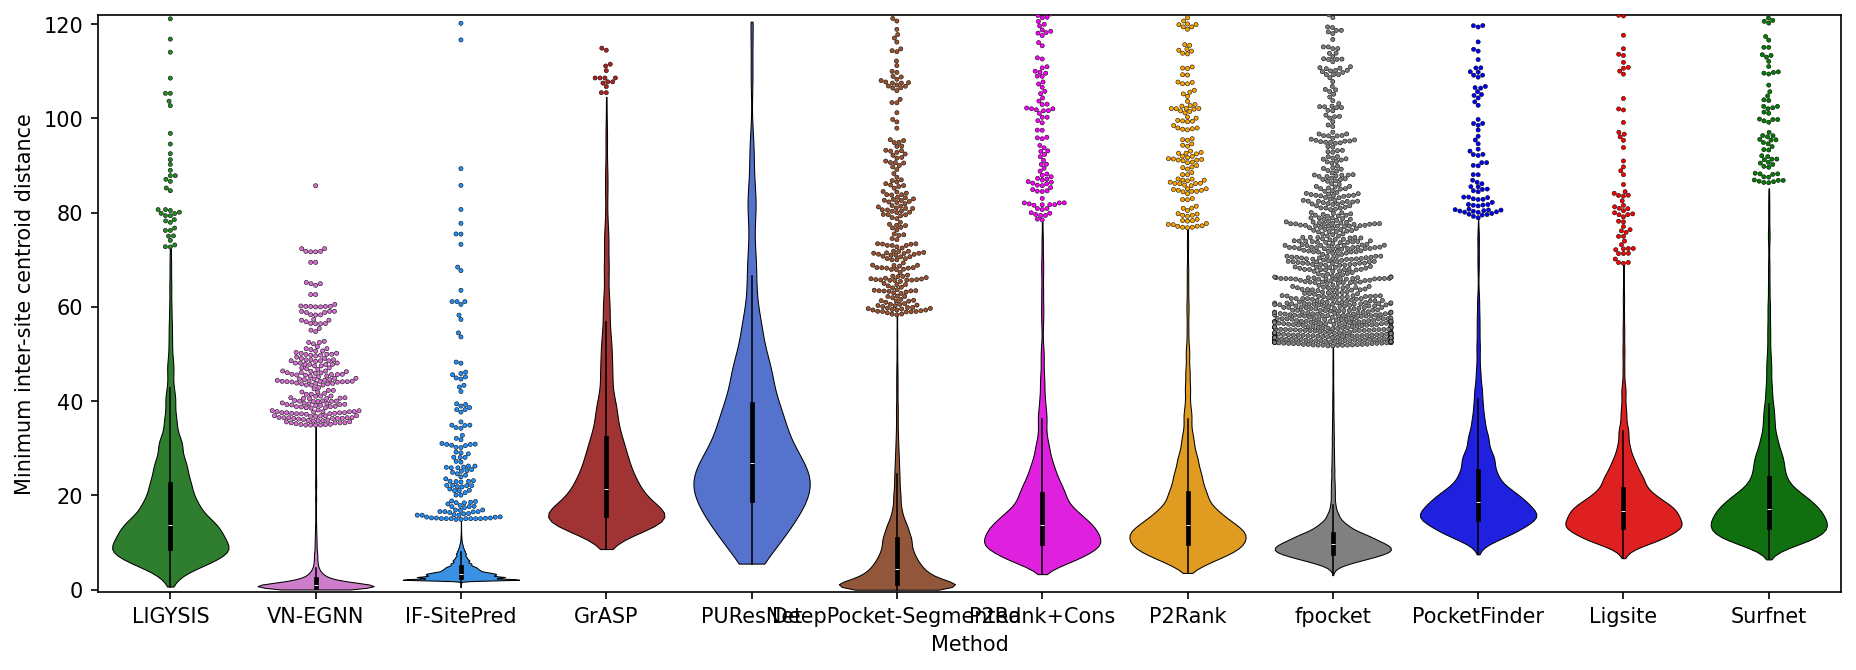

In [35]:
plot_violin_with_swarm(
    highest_overlap, "DIST", "Minimum inter-site centroid distance",
    FSIZE=(15, 5), DPI=150, palette=palette, my_order=my_order,
    #out = "./figs/minimum_dist_600.png",
    #ymax = 61.
    ymax_inc = 1.5
)

## Maximum inter-site overlap

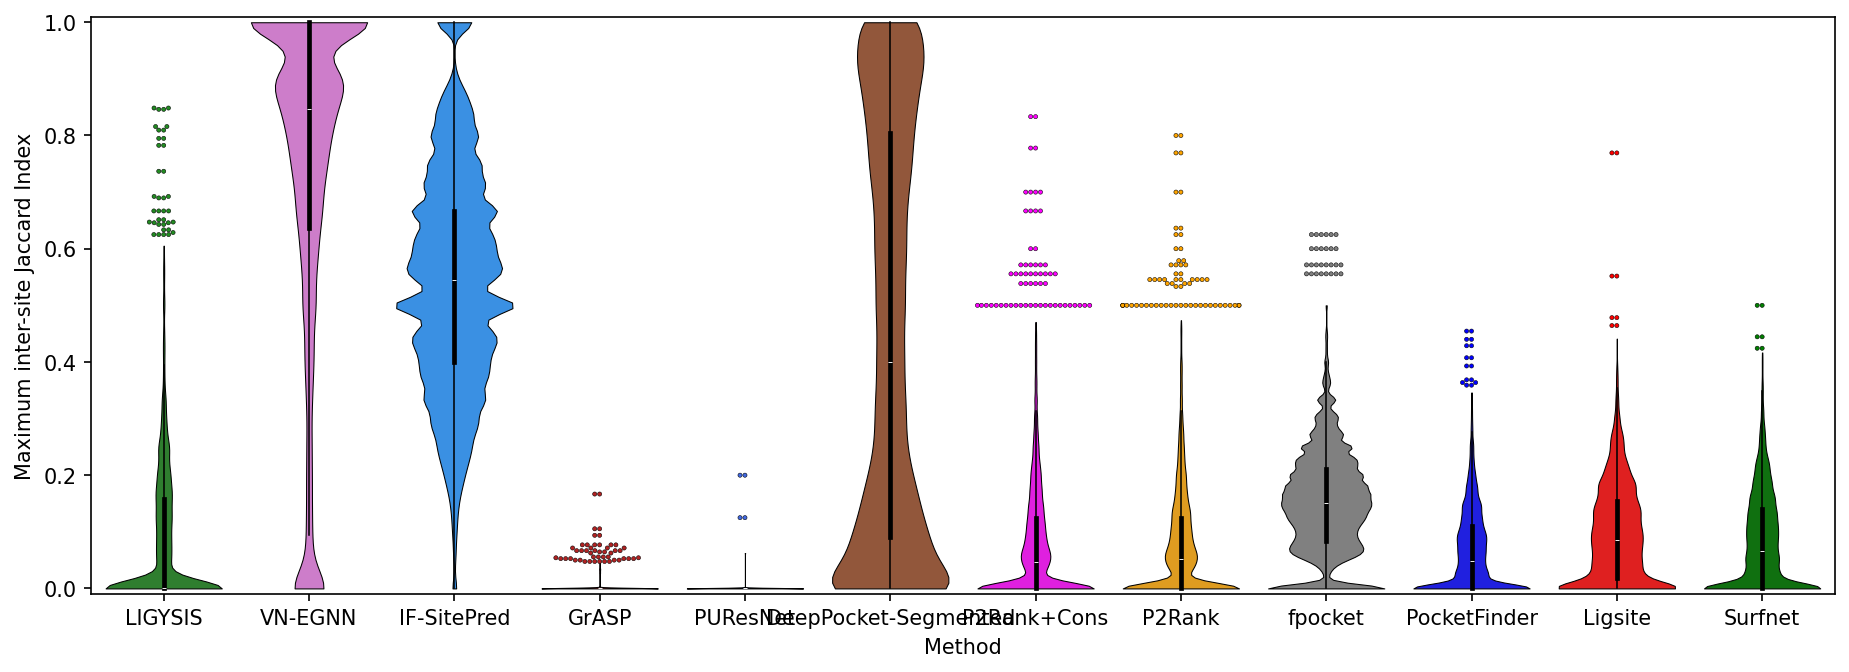

In [36]:
plot_violin_with_swarm(
    highest_overlap, "jaccard_index", "Maximum inter-site Jaccard Index",
    FSIZE=(15, 5), DPI=150, palette=palette, my_order=my_order,
    #out = "./figs/maximum_overlap_600.png",
    ymax = 1,
    ymin = 0,
    ymin_inc = 0.01,
    ymax_inc = 0.01
)